# Prediction of Insurance Charges

<a id='outline'></a>

### Outline


<b> 1. [Introduction](#intro) <br><br>
2. [Importing Libraries and Data](#import) <br><br>
3. [Exploratory Data Analysis](#analysis) <br>
</b>3.1. [DataFrame Description](#analysis-1) <br>
3.2. [Missing Values](#analysis-2)<br>
3.3. [Data Distribution](#analysis-3)<br>
3.4. [One-Hot Encoding](#analysis-4)<br>
3.5. [Scaling Numerical Columns](#analysis-5)<br><br>
<b>4. [Creating ML Models](#mlmodels) <br>
</b>4.1. [Regression Models](#mlmodels-1) <br>
4.2. [Model Tuning](#mlmodels-2)<br>
4.3. [Feature Importance](#mlmodels-3)<br><br>
<b>5. [Making Pipeline](#pipeline) <br><br>
<b>6. [Conclusion](#conclusion) <br>
</b>

<br><br>

<a id='intro'></a>

## 1. Introduction

**Motivation**

The insurance industry faces a significant obstacle in determining suitable premiums for their customers based on the risk they pose. It is crucial to accurately predict the amount of claims to aid insurer management decisions and financial records. The real-world challenge is to develop a more precise and automated method of forecasting insurance claims costs. Various factors, such as BMI, age, smoker, and health conditions, determine the cost of claims based on health factors. Insurance companies utilize various methods to analyze and forecast health insurance expenses. 

In this work, the dataset can be used to predict insurance charges using ML regression algorithms based on the age, sex, and BMI of a customer. Furthermore, this dataset provides us with an opportunity to explore deeper questions such as what are some possible solutions for increasing affordability when it comes to dealing with high charges for certain groups.

**Dataset**

The dataset is provided by  Bob Wakefield in the following link.<br>
https://data.world/bob-wakefield

**RoadMap**

<li>We begin our work as usual by importing libraries and dataset. 
<li>We make exploratory data analysis to get familiar with the data. The data will be cleaned along the way. 
<li>Then, we will predict insurance charges using various regression algoritms, e.g., <b>ElasticNet, KNN Regressor, SVM, MLP Regressor (Neural Network), Decision Tree, Bagging, RandomForest, ADABoost, GradientBoosting, XGBoost, LGBM</b> and <b>CatBoost Regressors</b>. 
<li>Based on the results, the best performing imputer will be selected and the best performing regressors will be tuned to improve our score.
<li><b>Pipeline</b> is utilized to automate all preprocessing and modelling steps and giving a new sample returns an output instantly. When this pipeline is integrated to a system, it can show a prediction of insurance charge automatically.

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='import'></a>

## 2. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_csv("insurance_charges.csv")

In [19]:
# Copying the dataframe to keep the original unspoiled.
df = data.copy()

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='analysis'></a>

## 3. Exploratory Data Analysis

<a id='analysis-1'></a>

### 3.1. DataFrame Description

Firstly, let's check what our dataframe looks like.

In [4]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


> * **index** column seems to be unnecessary. We can check duplicate before dropping it though. 
> * This dataset consists of pretty basic features. We will dive deeper into them.

In [8]:
# Check for duplicate entries
df['index'].duplicated().sum()

0

In [20]:
# Dropping unnecesary column
df = df.drop(columns='index')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> * All feature types seem to be correct.
> * Number of non-null values are the same (1338), in other words, there is no null values.
> * There are 7 features.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<br><br>It seems all columns but **Product_Info_2** are numerical.

In [12]:
# Checking unique categorical values
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


> * There are not many categorical values and all seem feasible.

<br><br>

<a id='analysis-2'></a>

### 3.2. Missing Values

In [14]:
# Checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<br><br>There are no missing values.

<br><br>

<a id='analysis-3'></a>

### 3.3. Data Distribution

<br>

**Distribution of float values**

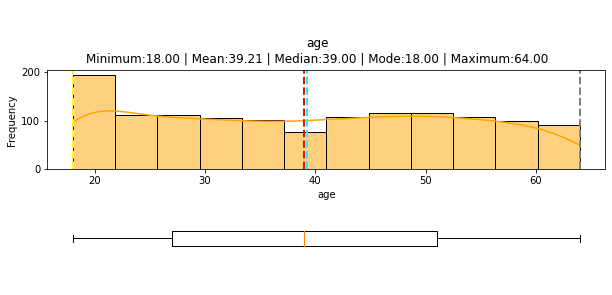

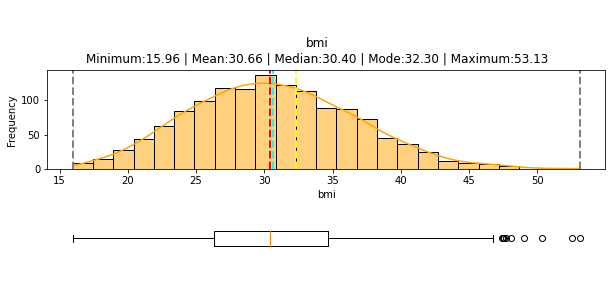

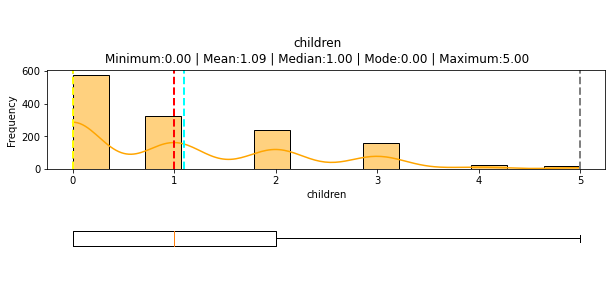

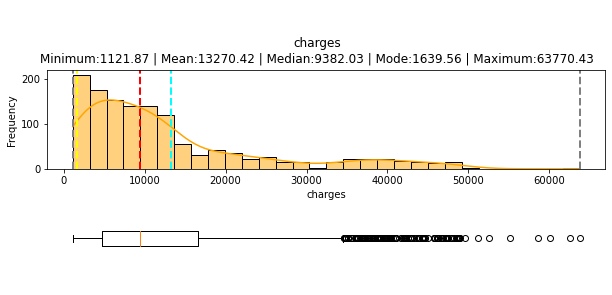

In [16]:
# Showing distribution of float values.

for col in df.select_dtypes(['int64','float64']).columns:
    # Selecting column excluding 0 values
    var_data = df[col]

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    sns.histplot(var_data, ax = ax[0], kde = True, color = 'orange')
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    ax[1].axis('off')

    # Add a title to the Figure
    fig.suptitle('\n\n{}\nMinimum:{:.2f} | Mean:{:.2f} | Median:{:.2f} | Mode:{:.2f} | Maximum:{:.2f}\n'.format(col,
                                                                                            min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val), y = 1.1)
    # Show the figure
    fig.show()


<br><br>

> **Evaluation of Numerical Features**
> * **Age** is uniformly distributed, whereas **bmi** is normally distributed. **children** and **charges** are exponantially distributed.
> * There are some values that can be considered as **outliers**. We can either remove them or apply **1.5 IQR** method. Since the number of observations is relatively small, the second option may be more feasible.

<br><br>

**Handling Outliers with 1.5 IQR Technique**

In [21]:
# Applying 1.5 IQR technique to numerical features

for col in df.select_dtypes(['int64', 'float64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_range if x < lower_range else x)
    df[col] = df[col].apply(lambda x: upper_range if x > upper_range else x)

<br><br>

**Distribution of categorical values**

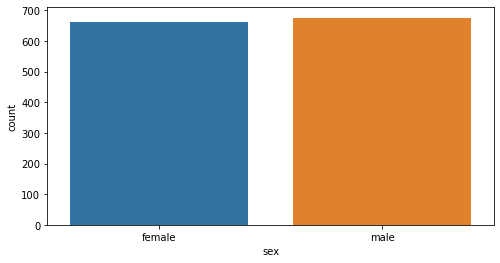

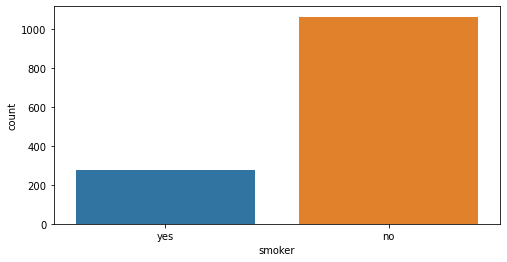

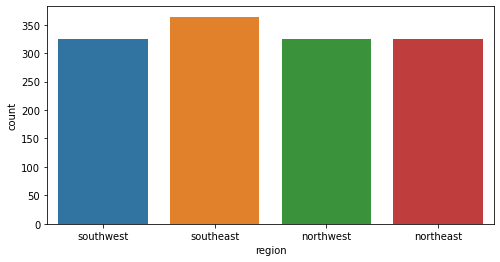

In [27]:
for col in df.select_dtypes(['object']).columns:
    plt.figure(figsize = (8,4))
    sns.countplot(x = df[col])
    plt.show();

<br><br>

> **Evaluation of Categorical Features**
> * The portion of **smokers** is considerably small. 
> * **sex** and **region** are evenly distirbuted.
> * The categorical values will be one-hot encoded to implement them in regression algorithms.

<br><br>

<a id='analysis-4'></a>

### 3.4. One-Hot Encoding

In this work we can use sci-kit learn's `OneHotEncoder()` for one-hot encoding categorical features.

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Defining one-hor encoding instance
ohe = OneHotEncoder(
                        categories = 'auto',  # Select caterogical values, ex: [['male', 'female']]
                        drop = 'first',  # Dropping the first col to stay away from dummy trap
                        sparse = True,  # Return a sparse matrix or array
                        handle_unknown = 'ignore'  # Give an error or ignore
                       )



In [29]:
# Selecting and Converting Categorical Features
categorical_features = df.select_dtypes(include = ['object'])
transformed_data = ohe.fit_transform(categorical_features)

# Creating a dataframe to visualize one-hot encoded values
encoded_data = pd.DataFrame(data = transformed_data.toarray(),  # Pass in the array here
                            columns = ohe.get_feature_names_out() # Assign column names from OneHotEncoder
                           )

In [30]:
encoded_data.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


<br><br>

<a id='analysis-5'></a>

### 3.5. Scaling Numerical Columns

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We want to scale only independent features, so we drop the target value before scaling.

In [92]:
numerical_cols = df.drop(columns='charges').select_dtypes(['int64', 'float64'])

In [94]:
scaled_data = pd.DataFrame(data = scaler.fit_transform(numerical_cols),
                           columns = numerical_cols.columns)

In [96]:
scaled_data.head()

,age,bmi,children
0,-1.438764,-0.454201,-0.908614
1,-1.509965,0.515300,-0.078767
2,-0.797954,0.388125,1.580926
3,-0.441948,-1.312218,-0.908614
4,-0.513149,-0.292342,-0.908614


<br><br>

<br>[Return to the Outline](#outline) <br>

<a id='mlmodels'></a>

## 4. ML Models

<a id='mlmodels-1'></a>

### 4.1. Regression Models

We should first define dependent and independent variables and split them as train and test.

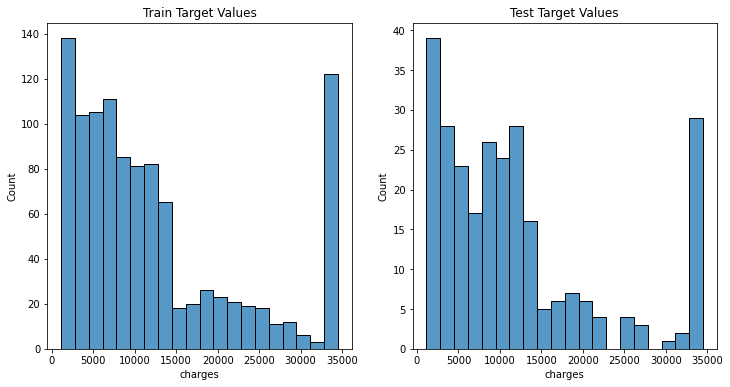

In [98]:
from sklearn.model_selection import train_test_split

# Determine X and y
X = pd.concat([scaled_data, encoded_data], axis = 1)
y = df_temp['charges']

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Plotting the disributions of the target value
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(x = y_train, bins = 20, ax = ax[0])
ax[0].set_title('Train Target Values')

sns.histplot(x = y_test, bins = 20, ax = ax[1])
ax[1].set_title('Test Target Values')
plt.show()



The distributions of train and test datasets are reasonably similar. Let's check how our independent variables looks like.

In [99]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.454201,-0.908614,0.0,1.0,0.0,0.0,1.0
1,-1.509965,0.515300,-0.078767,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.388125,1.580926,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.312218,-0.908614,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292342,-0.908614,1.0,0.0,1.0,0.0,0.0


Great! Now it is time to import some regression algorithms.

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [108]:
regression_algorithms = [ElasticNet(), KNeighborsRegressor(), SVR(),
                        MLPRegressor(), DecisionTreeRegressor(), BaggingRegressor(),
                        RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
                        XGBRegressor(), LGBMRegressor(), CatBoostRegressor(verbose=0)]

Let's also build a function to implement the algorithms one by one and record the metrics.

In [109]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

result_table = pd.DataFrame(columns = ['model', 'RMSE', 'MAE', 'R2'])

#define a function to test the models without tuning
def create_model(model):
    print('-'*50, '\n', str(model)[:50])
    
    # Creating the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Recording the result
    result_table.loc[len(result_table)] = [str(model)[:50], 
                                           np.sqrt(mean_squared_error(y_test, y_pred)),  #RMSE
                                           mean_absolute_error(y_test, y_pred),  #MAE
                                           r2_score(y_test, y_pred)]  #R2 score


In [110]:
# Running the algorithms one by one
for model in regression_algorithms:
    create_model(model)

-------------------------------------------------- 
 ElasticNet()
-------------------------------------------------- 
 KNeighborsRegressor()
-------------------------------------------------- 
 SVR()
-------------------------------------------------- 
 MLPRegressor()
-------------------------------------------------- 
 DecisionTreeRegressor()
-------------------------------------------------- 
 BaggingRegressor()
-------------------------------------------------- 
 RandomForestRegressor()
-------------------------------------------------- 
 AdaBoostRegressor()
-------------------------------------------------- 
 GradientBoostingRegressor()
-------------------------------------------------- 
 XGBRegressor(base_score=None, booster=None, callba
-------------------------------------------------- 
 LGBMRegressor()
-------------------------------------------------- 
 <catboost.core.CatBoostRegressor object at 0x7fc53


<AxesSubplot:ylabel='model'>

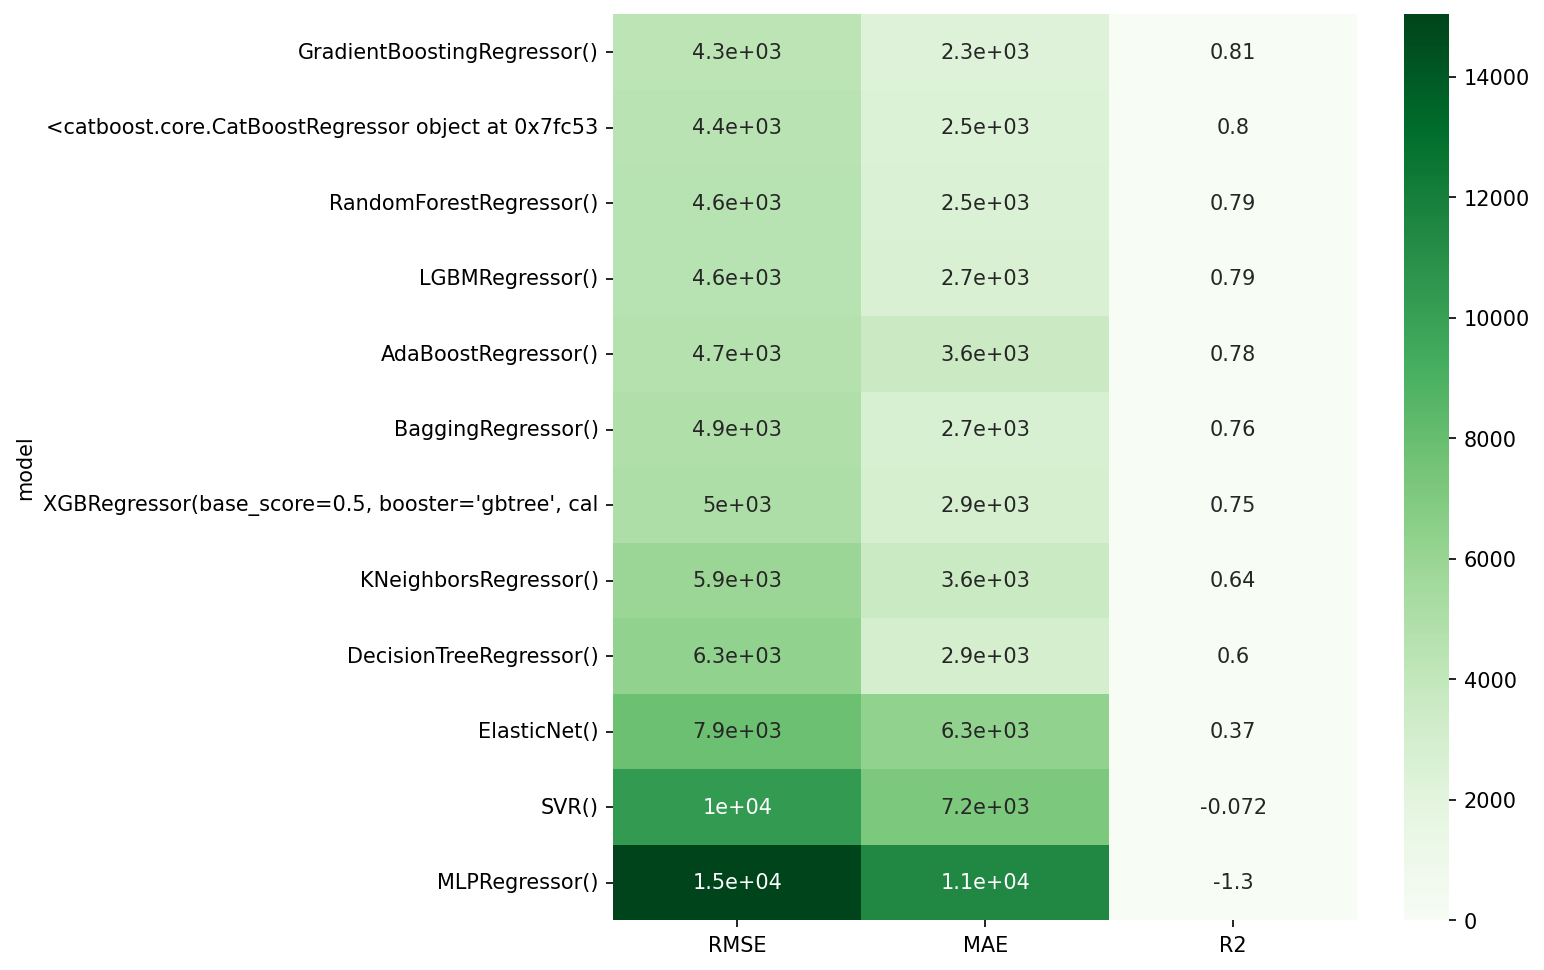

In [111]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'RMSE', ascending = True), annot = True, cmap = 'Greens')

In [127]:
# Mean of the target value
df['charges'].mean()

12479.369250625168

In [118]:
# Getting the predictions from the best performing model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

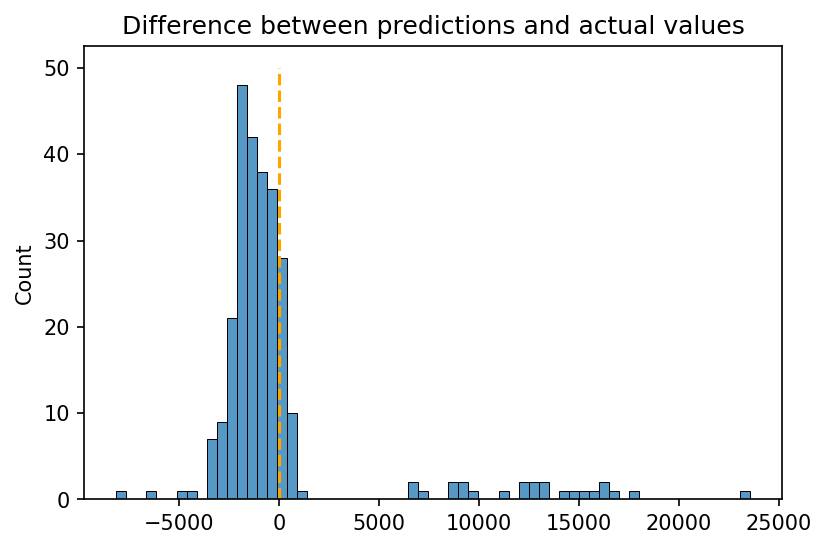

In [142]:
plt.figure(dpi = 150)
sns.histplot(y_test.values - y_pred)
plt.vlines(x = 0, ymin=0, ymax=50, linestyles='--', color = 'orange')
plt.title('Difference between predictions and actual values');

<br><br>

> **Evaluation of Results**
> * **GradientBoosting** give the best RMSE and MAE values for our data set. It has also 81% R2 score. These scores may be even better after hyperparameter tuning.
> * The mean of the target value is 12.4 x1000 and RMSE is 4.3 x 1000. It is not a small number, however, the distribution of difference between predictions and actual values shows that this difference is caused mainly by extreme values. It may be worth to split extreme charge values, but I will not do that in this study to keep it short.

<br><br>

<a id='mlmodels-2'></a>

### 4.2. Model Tuning

In this section, we will try to tune our best algorithm to get better scores.

In [128]:
from sklearn.model_selection import RandomizedSearchCV

model = GradientBoostingRegressor()
param_grid = {"learning_rate":[0.01,0.02,0.1], 
              "n_estimators":[100,1000,7000], 
              "subsample":[0.9,1.0]
              }

In [129]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.02, 0.1],
                                        'n_estimators': [100, 1000, 7000],
                                        'subsample': [0.9, 1.0]})

In [130]:
cv_model.best_params_

{'subsample': 1.0, 'n_estimators': 1000, 'learning_rate': 0.01}

In [131]:
model = GradientBoostingRegressor(subsample = 1.0, 
                           n_estimators = 1000,
                          learning_rate = 0.01)

create_model(model);

-------------------------------------------------- 
 GradientBoostingRegressor(learning_rate=0.01, n_es


<AxesSubplot:ylabel='model'>

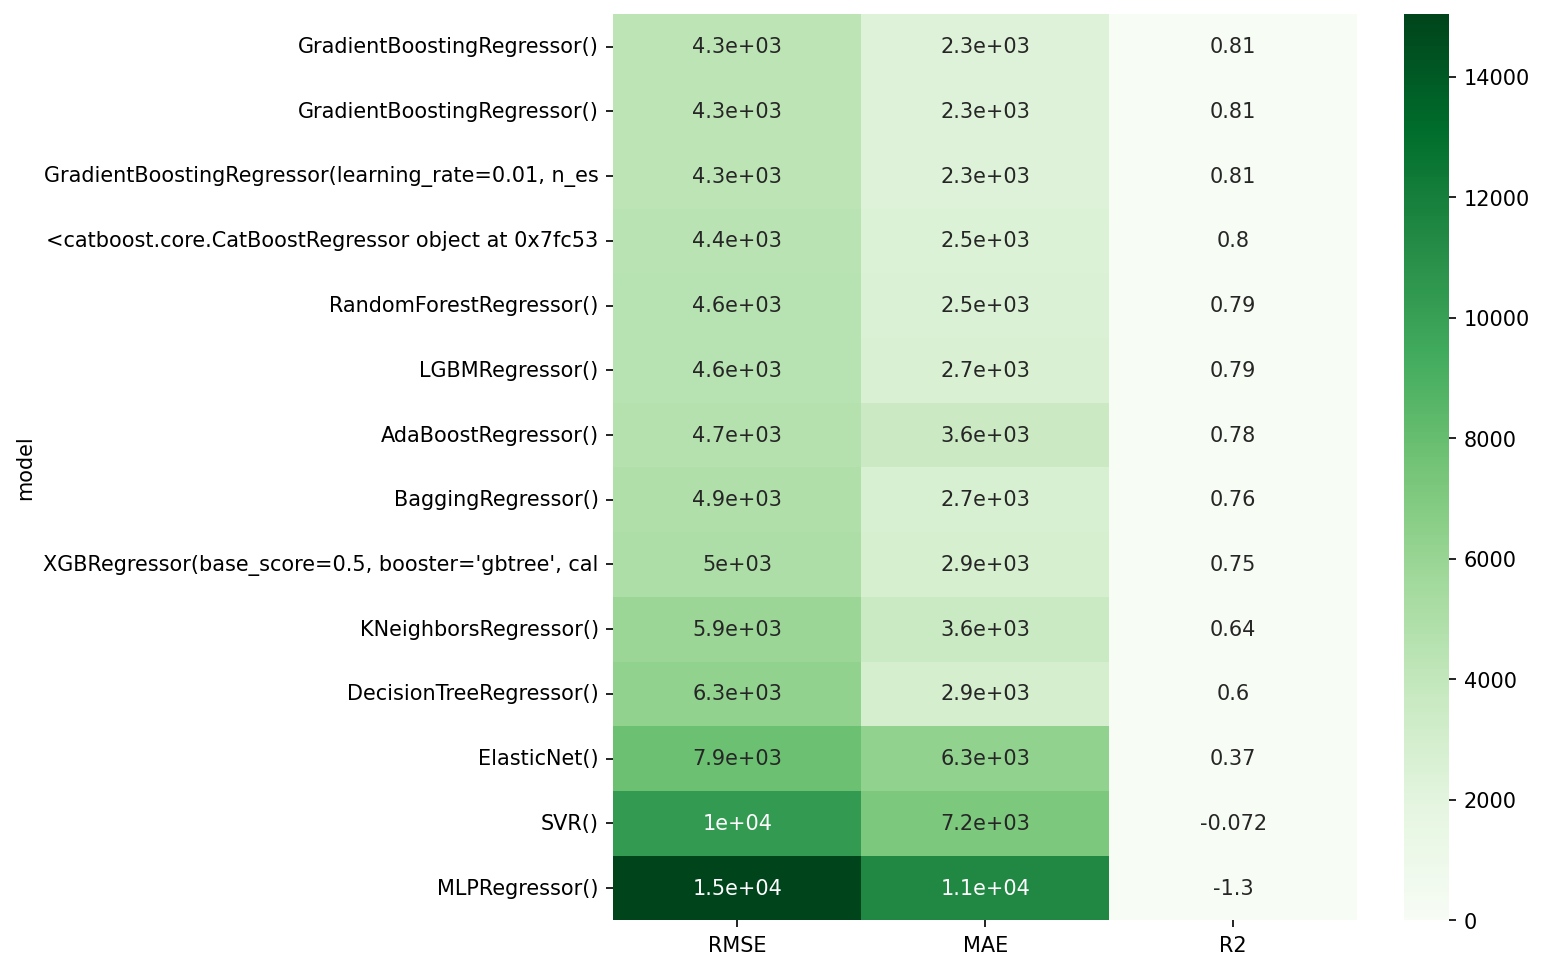

In [132]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'RMSE', ascending = True), annot = True, cmap = 'Greens')

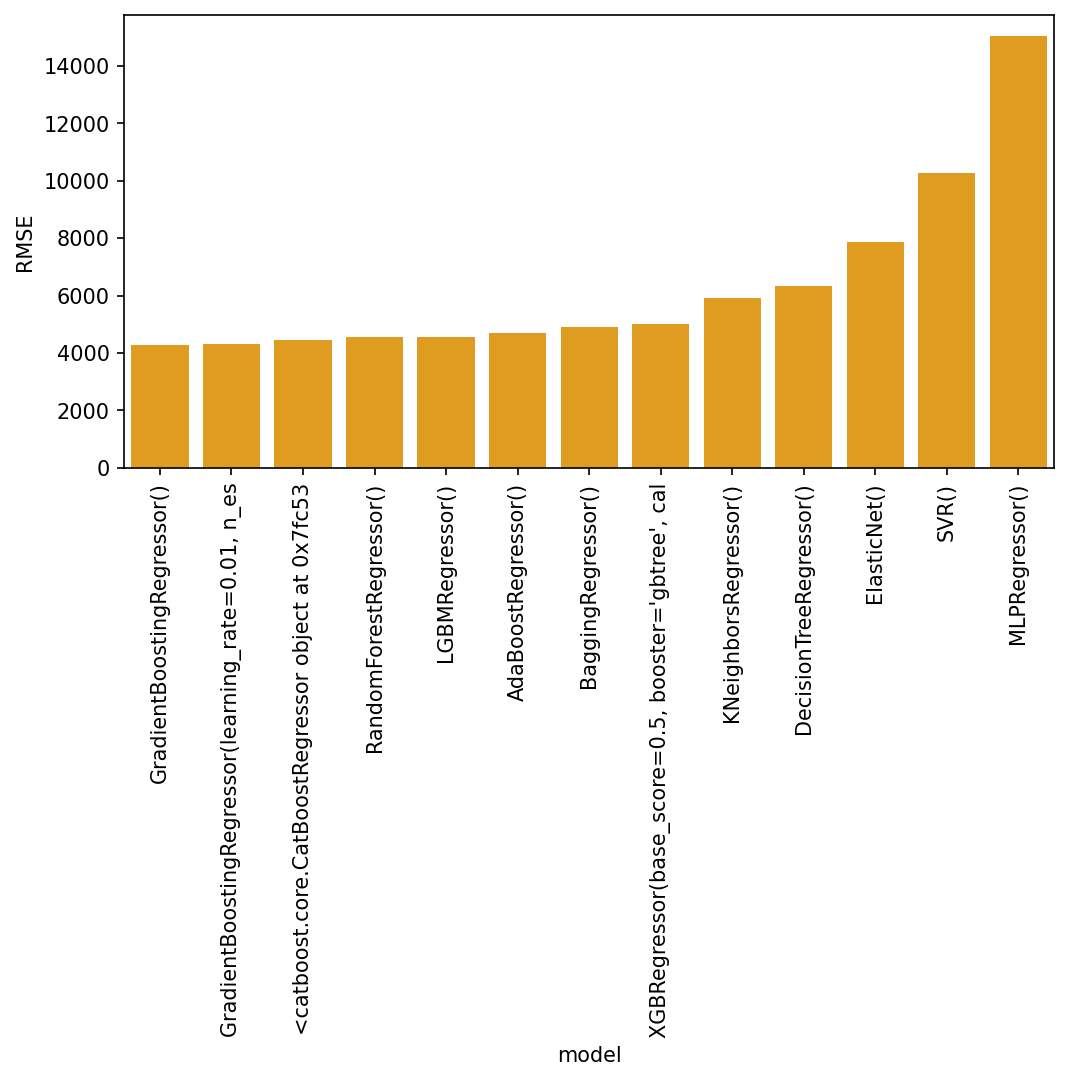

In [153]:
plt.figure(dpi = 150, figsize=(8,4))
sns.barplot(data = result_table.sort_values(by = 'RMSE'), x = 'model', y = 'RMSE', color = 'orange')
plt.xticks(rotation = 90);

> **Evaluation of Results**
> * Tuned model gives almost the same scores, but we know now that crossvalidation will give some avoiding of overfitting advantage.

<br><br>

<a id='mlmodels-3'></a>

### 4.3. Feature Importance

Let's check which features are the most effective to detect fraud.

In [156]:
# Creating a dataframe for feature importances
imp_feats = pd.DataFrame(data = model.feature_importances_,
                         index = X.columns,columns = ['Feature Importance']).sort_values("Feature Importance")

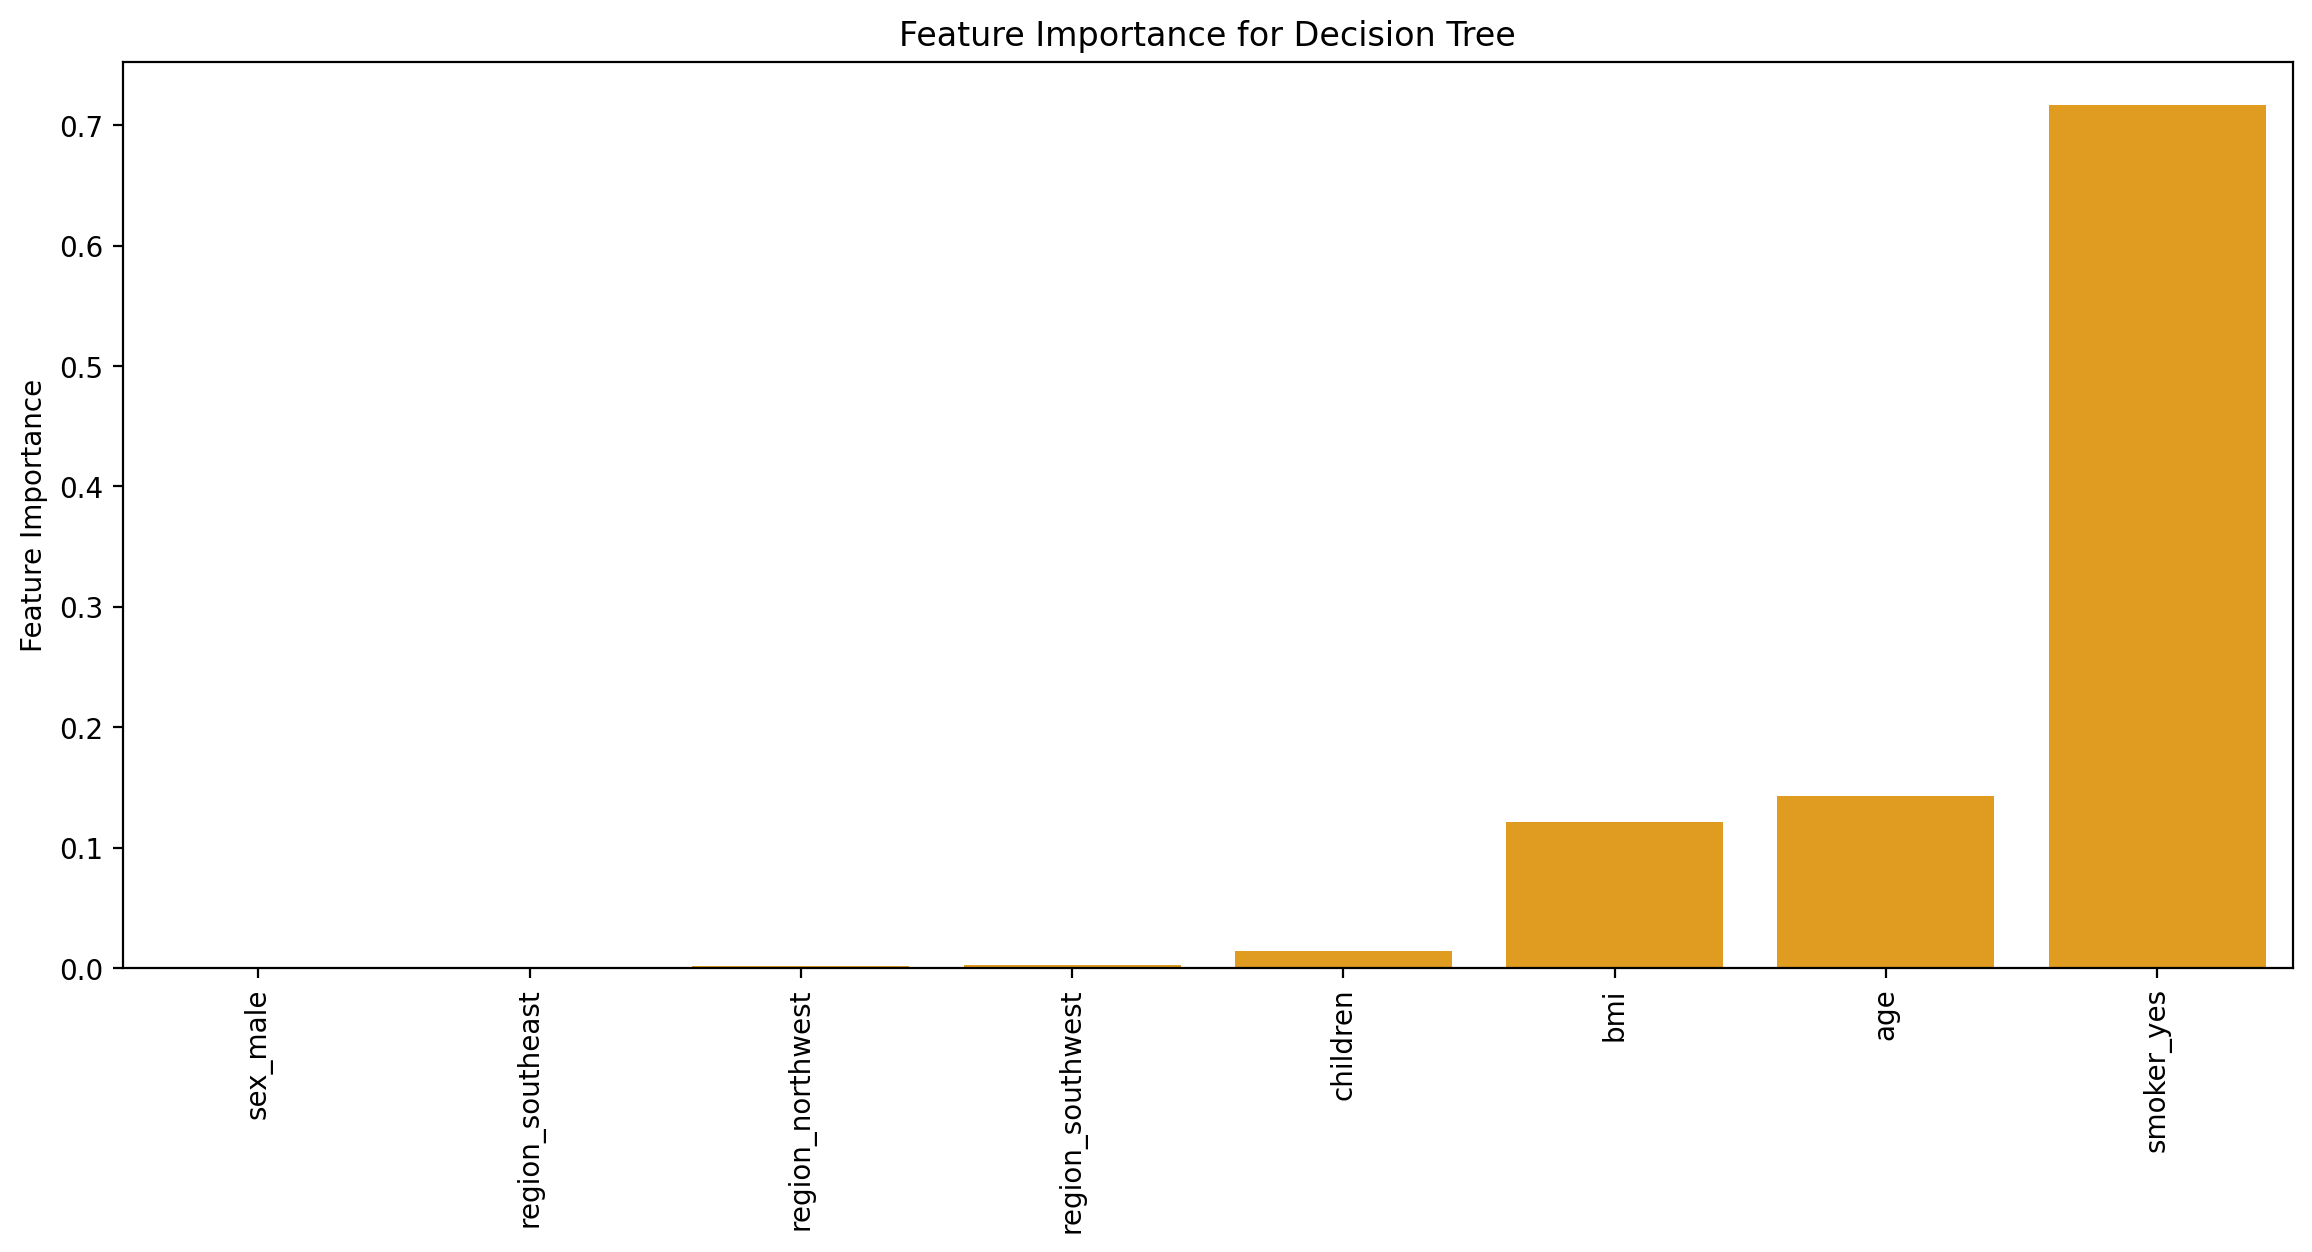

In [159]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data = imp_feats,
            x = imp_feats.index,
            y = 'Feature Importance', color = 'orange')
plt.xticks(rotation = 90)
plt.title("Feature Importance for Decision Tree");

> **Evaluation of Results**
> * Being a smoker is clearly the most important parameter when calculating inscurance charge. **age** and **bmi** follow the smokers.

<br><br>

<br>[Return to the Outline](#outline) <br>

<a id='pipeline'></a>

## 5. Making Pipeline

In this section, we create pipeline to automate preprocessing and modelling work so that when we enter a new value our pipeline do all the steps for us and gives us the prediction. We will use `Pipeline` and `ColumnTransformer`.

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [166]:
for col in df.select_dtypes('object').columns:
    print(df[col].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


Numeric Features:
* `age`: int
* `bmi`: float
* `children`: int


Categorical Features:

* `sex`: categories encoded as strings `{'female', 'male'}`
* `smoker`: categories encoded as strings `{'yes', 'no'}`
* `region`: categories encoded as strings `{'southwest' 'southeast' 'northwest' 'northeast'}`

In [170]:
# Select numeric and categorical features and decide what to do with them
numeric_features = df.drop(columns='charges').select_dtypes(['int64', 'float64']).columns
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = df.select_dtypes(['object']).columns
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# Define a ColumnTransformer to deal with mixed type of data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [175]:
# Create a pipeline with the preprocessor and our tuned regressor model 
model = GradientBoostingRegressor(subsample = 1.0, 
                           n_estimators = 1000,
                          learning_rate = 0.01)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", model)]
)

# Define X and y variables and fit the model
X = df.drop(columns='charges')
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("model RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("model R2: %.3f" % r2_score(y_test, y_pred))

model RMSE: 4090.863
model R2: 0.846


<br>**Getting a prediction for a new value**

Enter `'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'`

In [216]:
new_customer = [[45, 'female', 25.175, 2, 'no', 'northeast']]

print(f'The predicted insurance charge: $ {clf.predict(pd.DataFrame(data = new_customer, columns= X.columns))[0]:.0f}')

The predicted insurance charge: $ 11204


<br><br>Thanks to `OneHotEncoder` our model knows what to do when it faces an unknown categorical value in the feature. Such cases would raise errors if we use `pd.getdummies()` method. Let's try **istanbul** region which was not in the training dataset.

In [217]:
new_customer = [[45, 'female', 25.175, 2, 'no', 'istanbul']]

print(f'The predicted insurance charge: $ {clf.predict(pd.DataFrame(data = new_customer, columns= X.columns))[0]:.0f}')

The predicted insurance charge: $ 10367


<br><br>

<br>[Return to the Outline](#outline) <br>

<a id='conclusion'></a>

## 6. Conclusion

One of the most crucial work for insurance companies is the determining the optimal price for their customers. The dataset in this work can be used to predict insurance charges based on the age, sex, and BMI of a customer. The data has been gathered from a variety of sources and contains information such as age, gender, region and bmi values for each customer.

Various regression algorithms such as **ElasticNet, KNeighborsRegressor, SVR, MLPRegressor, DecisionTreeRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor, CatBoostRegressor** are implemented and their RMSE, MAE and R2 scores are recorded.  

Eventually, **GradientBoostingRegressor** has given the best scores in all three, so the hyperparameters for this algorithm are tuned. As a result **81%** R2 score is achieved with 4.3x1000 RMSE. The distribution of the difference between predictions and actual values shows that better score could have been achieved if the extreme charges were dropped.

**Being a smoker** is the most efficient factor that affects insurance charges. It is followed by **age** and **bmi**. Having a **children** has also a small effect on the charges.

Finally, the preprocessing steps and regression modelling is implemented in a **pipeline** so that when a new sample is entered, the insurance charge is automatically calculated for the end users.

> **Check my other works in my Github Page** https://github.com/DrFarukAydin/data-science-portfolio

<br>[Return to the Outline](#outline) <br>